In [4]:
import numpy as np

In [5]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp =  np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

data = []   
for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    data.append(xs)
    print(data[0])
    y = AND(xs[0], xs[1])
    print(str(xs) + " -> " + str(y))

(0, 0)
(0, 0) -> 0
(0, 0)
(1, 0) -> 0
(0, 0)
(0, 1) -> 0
(0, 0)
(1, 1) -> 1


In [1]:
!nvidia-smi

Wed Aug 25 01:41:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [6]:
!pip install tensorflow-gpu

     |████████████████████████████████| 458.3 MB 11 kB/s 


In [8]:
import tensorflow as tf

tf.random.set_seed(777) # 시드를 설정 함.

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse

# 데이터 준비하기
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[1]])

#모델 구성하기

model = Sequential()
#층을 쌓겠다

#단층 퍼셉트론을 구성
model.add(Dense(1, input_shape = (2, ), activation = 'linear')) #뉴런 1개
#input_size = (2,placeholder)
#activation = 직성
#모델add = 층에 추가하겠다


#모델 준비하기

model.compile(optimizer = 'SGD',
              loss = mse,
              metrics = ['acc']) #list형태로 평가지표를 전달

#학습시키기

model.fit(x,y,epochs = 500)

Epoch 1/500
1/1 [==============================] - 0s 321ms/step - loss: 1.4290 - acc: 0.5000
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 1.3602 - acc: 0.5000
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 1.2956 - acc: 0.5000
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 1.2349 - acc: 0.5000
Epoch 5/500
1/1 [==============================] - 0s 8ms/step - loss: 1.1779 - acc: 0.5000
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 1.1242 - acc: 0.5000
Epoch 7/500
1/1 [==============================] - 0s 5ms/step - loss: 1.0738 - acc: 0.5000
Epoch 8/500
1/1 [==============================] - 0s 12ms/step - loss: 1.0264 - acc: 0.5000
Epoch 9/500
1/1 [==============================] - 0s 17ms/step - loss: 0.9819 - acc: 0.5000
Epoch 10/500
1/1 [==============================] - 0s 5ms/step - loss: 0.9399 - acc: 0.5000
Epoch 11/500
1/1 [==============================] - 0s 11ms/step - loss: 0.

In [10]:
model.get_weights

<bound method Model.get_weights of <keras.engine.sequential.Sequential object at 0x7f6ca0da5750>>

In [1]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

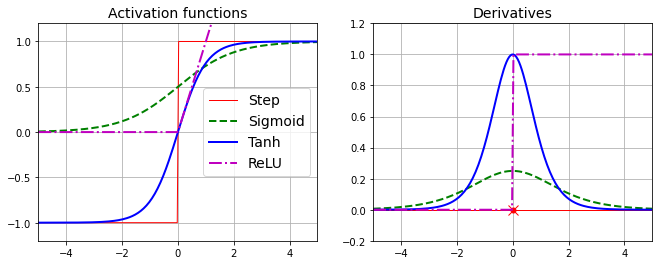

In [3]:
import matplotlib.pyplot as plt
import numpy as np
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

In [4]:
import tensorflow as tf
import numpy as np

## data 선언
x_data = [[0.,0.], [0.,1.], [1.,0.],[1.,1.]]
y_data = [[1.], [0.], [0.], [1.]]

## tf.keras를 활용한 perceptron 모델 구현.
input_Layer = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(2, activation='sigmoid')(input_Layer)
#variable 1 : 뉴런의 갯수
Out_Layer= tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary() # 층을 쌓은걸 볼수 있다.

# 모델 loss, 학습 방법 결정하기
optimizer=tf.keras.optimizers.SGD(lr=0.7) ### 경사 하강법으로 global min 에 찾아가는 최적화 방법 선언.
loss=tf.keras.losses.binary_crossentropy  ## 예측값 과 정답의 오차값 정의. mse는 mean squre error로 (예측값 - 정답)^2 를 의미
metrics=tf.keras.metrics.binary_accuracy ### 학습하면서 평가할 메트릭스 선언언

# 모델 컴파일하기
model.compile(loss=loss, optimizer=optimizer, metrics=[metrics])

# 모델 동작하기
model.fit(x_data, y_data, epochs=100, batch_size=4)
# model.fit(x_data,y_data, epochs=1000,)

#그래디언트 하는 이유는
# ML에서는 계수들을 최적화하고
# 딥러닝은 뉴런의 계수들을 최적화 합니다.

# 바뀌는 변수가 있냐?
# 흠...굉장히 애매한
# 질문이군요 ㅠㅠ
# 흠 저는 activation function이랑 optimizer를 고정해놓고
# 층을 여러번 바꿔보는 형식으로 합니다.;
# activation function은 relu로 고정하고 optimizer도 adam으로 고정해놓고
# 파라미터들을 조정하거나 층을 조절합니다.


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.6936 - binary_accuracy: 0.2500
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 0.6928 - binary_accuracy: 0.2500
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6924 - binary_accuracy: 0.2500
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6922 - binary_accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6921 - binary_accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6920 - binary_accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6919 - binary_accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6918 - binary_accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 0.6917 - binary_accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 5ms/step -

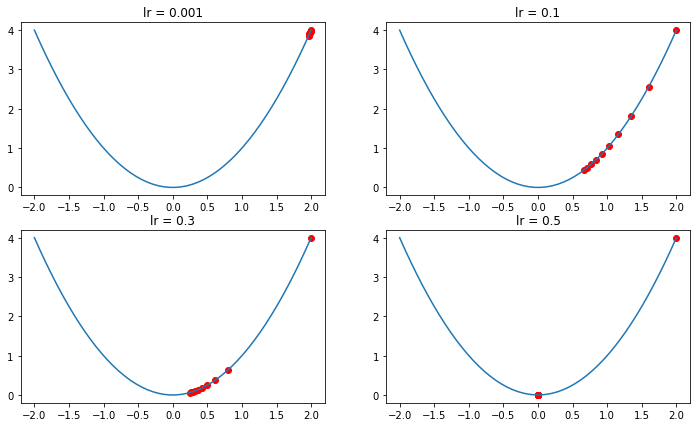

In [5]:
import numpy as np
import matplotlib.pyplot as plt

lr_list = [0.001, 0.1, 0.3, 0.5]

def get_derivative(lr_list):

  w_old = 2
  derivative = [w_old]

  y = [w_old ** 2] # 손실 함수를 y = x^2로 정의함.

  for i in range(1,10):
    #먼저 해당 위치에서 미분값을 구함

    dev_value = w_old **2

    #위의 값을 이용하여 가중치를 업데이트
    w_new = w_old - lr * dev_value
    w_old = w_new

    derivative.append(w_old) #업데이트 된 가중치를 저장 함,.
    y.append(w_old ** 2) #업데이트 된 가중치의 손실값을 저장 함.

  return derivative, y

x = np.linspace(-2,2,50) 
x_square = [i**2 for i in x]

fig = plt.figure(figsize=(12, 7))

for i,lr in enumerate(lr_list):
  derivative, y =get_derivative(lr)
  ax = fig.add_subplot(2, 2, i+1)
  ax.scatter(derivative, y, color = 'red')
  ax.plot(x, x_square)
  ax.title.set_text('lr = '+str(lr))

plt.show()

In [52]:
# MNIST 데이터를 다운로드 한다.
import tensorflow as tf
# X_train,X_test,y_train,y_test = train_test.split()~~
# 과는 다르다!

# .npz = csv 를 npz로 저장하면 다음에 불러올 때 속도가 증가한다

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [53]:
print(x_train.shape, y_train.shape,x_test.shape,y_test.shape)

#60000 : TF는 들어오는게 (N,w,h,c)
# N : batch사이즈
# w : 위드스
# h : hegith
# c : channel
# channel 이 1이면 무시된다
hi = x_train[3]
hi.shape

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


(28, 28)

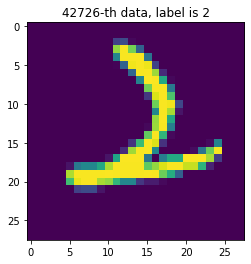

In [54]:
import matplotlib.pyplot as plt
import numpy as np

sample_size = 1 
# 0~59999이 범위에서 세 개의 정수를 뽑는다.
random_idx = np.random.randint(60000, size = sample_size)

for idx in random_idx:
  img = x_train[idx]
  # : 픽셀을 다 가져와라
  label = y_train[idx]
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th data, label is %d' %(idx, label))

In [55]:
# 검증 데이터 만들기

from sklearn.model_selection import train_test_split

#훈련/테스트 데이터를 0.7/0.3 의 비율로 분리

x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size = 0.3, random_state =777) # test size는 테스트셋의 비율 의미. random_state는 재산성을 위해 사용(random_seed와 동일)

print(f'훈련 데이터 {x_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {x_val.shape} 레이블 {y_val.shape}')

훈련 데이터 (42000, 28, 28) 레이블 (42000,)
검증 데이터 (18000, 28, 28) 레이블 (18000,)


In [56]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0] # 훈련데이터 총 6만개
num_x_test = x_test.shape[0] # 테스트데이터 총 1만개(평가대상)

#모델에 입력하기 전 전처리 과정.
# 28*28 = 784
# 전체를 255로 나누면 0-1로 변환이된다(가장큰거로 나누는 형태니까)
x_train = (x_train.reshape((num_x_train, 28*28))) / 255
x_val = (x_val.reshape((num_x_val, 28*28))) / 255
x_test = (x_test.reshape((num_x_test, 28*28)))/ 255

print(x_train.shape)  # 모델 입력을 위해 데이터를 784차원으로 변경

(42000, 784)


딥러닝의 가정조건
1.data수는 10K
2. weight 의 분포 -> 정규분포이면 좋다(데이터->모델->에러
3. scaling/squre matrix(row의갯수 = col의 갯수)
4.flatten(input을) $1*N$ or $N*1$



In [57]:
from tensorflow.keras.utils import to_categorical

#각 데이터의 레이블을 범주형 형태로 변경.
print(y_train)
print(y_val)
print(y_test)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)
# 이걸 안하면 뒤에 로스펑션이 달라진다
# 이게 뭔소리여 쉬부럴
# y_train이 레이블을 알려주는데..
# 그러면.. 
# 지금 y_train을 찍어보면 array([1, 9, 6, ..., 2, 8, 5], dtype=uint8) 이런식으로 들어와있는데, 지금 저희는 모델을 pred해서 이게 몇이냐를 학습시킬려고 하는데, 각 자리에 숫자가 코딩이 안되어잇기 때문에
# 각 숫자를 비워두고
# 이제 틀린거에요 라고 학습시킬려고 특정한 숫자 이외에는 다 0으로 바꾼 onet-hot encoding을 사용하였습니다.
# 그러니까 해당 인덱스 값만 1로 만들고 나머지는 0으로 만든다 라는 의미인듯하다
print(y_train)
print(y_val)
print(x_train)

[2 7 6 ... 3 4 5]
[7 8 3 ... 4 7 6]
[7 2 1 ... 4 5 6]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [29]:
def softmax(arr):
  m = np.max(arr)
  arr = arr - m #exp의 오버플로우 방지  참고 : https://mkmehpp.tistory.com/2
  arr = np.exp(arr)
  return arr/ np.sum(arr)

def sigmoid(x):
  return 1/(1+np.exp(-x))

case_1 = np.array([3.1, 3.0, 2.9])
case_2 = np.array([2.0, 1.0, 0.7])

np.set_printoptions(precision=3)
print(f'sigmoid {sigmoid(case_1)}, softmax {softmax(case_1)}')
# 시그모이드는 다 더하면 1이넘을 수 있는데
# 소프트맥스는 다 더하면 1이다 , 확률을 뱉는다
print(f'sigmoid {sigmoid(case_2)}, softmax {softmax(case_2)}')

sigmoid [0.957 0.953 0.948], softmax [0.367 0.332 0.301]
sigmoid [0.881 0.731 0.668], softmax [0.61  0.224 0.166]


In [40]:
# 학습과정 설정하기.
model.compile(optimizer = 'adam', #옵티마이저 : Adam
              #손실함수 : categorical_crossentropy
              loss = 'categorical_crossentropy',
              # 모니터링 할 평가지표 : acc
              metrics = ['acc'])

# 모델 학습하기
history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 128,
                    validation_data = (x_val,y_val))

Epoch 1/30
329/329 [==============================] - 2s 5ms/step - loss: 0.4955 - acc: 0.8621 - val_loss: 0.2501 - val_acc: 0.9315
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.2135 - acc: 0.9387 - val_loss: 0.1896 - val_acc: 0.9471
Epoch 3/30
329/329 [==============================] - 2s 5ms/step - loss: 0.1622 - acc: 0.9535 - val_loss: 0.1599 - val_acc: 0.9536
Epoch 4/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1323 - acc: 0.9622 - val_loss: 0.1429 - val_acc: 0.9581
Epoch 5/30
329/329 [==============================] - 1s 4ms/step - loss: 0.1124 - acc: 0.9670 - val_loss: 0.1423 - val_acc: 0.9591
Epoch 6/30
329/329 [==============================] - 1s 4ms/step - loss: 0.0964 - acc: 0.9724 - val_loss: 0.1244 - val_acc: 0.9637
Epoch 7/30
329/329 [==============================] - 2s 5ms/step - loss: 0.0837 - acc: 0.9753 - val_loss: 0.1226 - val_acc: 0.9628
Epoch 8/30
329/329 [==============================] - 1s 4ms/step - loss: 0.

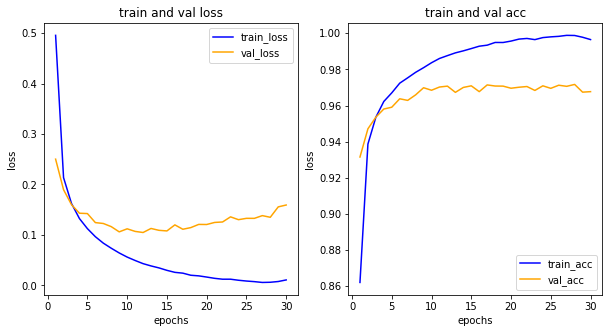

In [49]:
#학습결과 그려보기
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 val_ 수식어가 붙는다.

epochs = range(1,len(loss)+1 )
fig = plt.figure(figsize= (10,5) )

# 학습 및 검증 손실 그리기

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']
# val : train의 검증데이터
# train이 잘되고 있는지 평가하는것?
# 학습 및 검증 정확도 그리기
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()


plt.show()

In [60]:
import numpy as np

results = model.predict(x_test)
print(results.shape)
np.set_printoptions(precision=7)
#소숫점 늘려줘 7로
print(f'각 클래스에 속할 확률 :  {results[0]}')
print(x_test[0])

(10000, 10)
각 클래스에 속할 확률 :  [6.3932289e-16 3.5655030e-15 6.3952360e-10 6.3441363e-10 2.3640277e-15
 5.9014273e-11 3.9997263e-24 1.0000000e+00 9.9492181e-13 4.4487283e-08]
[0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        0.        0.        

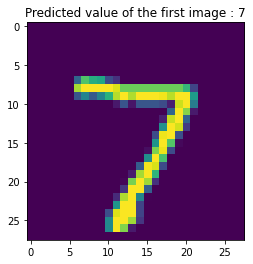

In [61]:
import matplotlib.pyplot as plt

arg_results = np.argmax(results, axis = -1) #  가장 큰 값의 인덱스를 가져옴
#원핫인코딩 값을 다시 vector로 바꾼다

plt.imshow(x_test[0].reshape(28, 28))
plt.title('Predicted value of the first image : ' +str(arg_results[0]))
plt.show()